# This file include Priciple Component Analysis "PCA" Insight wth visaulized results
### starts from cell 26

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [6]:
df = pd.read_csv('Bridebook - DS - challengeData.1634399212.csv')
df.head(11)

,userId,regTime,testVariant,primaryAccount,regPage,device,app,browser,browserVersion,screenHeight,...,addedGuestCount,addedBudget,invitedCollaborator,addedNames,finOnb,searchCTA,venEnq,venSearch,venViews,sessions
0,0,1612810000000,0,True,/,Android,True,Chrome,77.0,823,...,True,True,False,True,1,0,0,0,0,6
1,1,1612110000000,1,True,/,Android,True,Chrome,76.0,732,...,True,True,False,True,1,0,0,0,0,2
2,2,1612480000000,2,True,/,iPhone,True,Mobile Safari,NaN,812,...,True,False,True,True,1,1,1,14,16,1
3,3,1612680000000,1,True,/,iPhone,True,Mobile Safari,NaN,667,...,True,True,True,True,1,1,0,4,4,3
4,4,1613010000000,0,True,/,Android,True,Chrome,77.0,740,...,False,True,False,True,1,0,0,0,0,1
5,5,1611960000000,0,True,/,iPad,True,Mobile Safari,NaN,1024,...,True,True,False,True,1,1,0,3,0,1
6,6,1612180000000,2,True,/,iPhone,True,Mobile Safari,NaN,736,...,False,False,False,True,1,0,0,0,0,1
7,7,1612200000000,0,True,/,Android,True,Chrome,76.0,869,...,False,True,False,True,1,0,0,0,0,1
8,8,1612550000000,0,True,/,Android,True,Chrome,76.0,780,...,True,True,True,True,1,0,0,0,0,1
9,9,1612980000000,1,True,/,iPhone,True,Mobile Safari,NaN,736,...,True,True,True,True,1,1,1,2,1,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   userId               1051 non-null   int64  
 1   regTime              1051 non-null   int64  
 2   testVariant          1051 non-null   int64  
 3   primaryAccount       1051 non-null   bool   
 4   regPage              1051 non-null   object 
 5   device               1051 non-null   object 
 6   app                  1051 non-null   bool   
 7   browser              1051 non-null   object 
 8   browserVersion       409 non-null    float64
 9   screenHeight         1051 non-null   int64  
 10  screenWidth          1051 non-null   int64  
 11  authMethod           1051 non-null   object 
 12  locationStep         1051 non-null   object 
 13  addedCity            1051 non-null   int64  
 14  locationCountry      442 non-null    object 
 15  addedGuestCount      1051 non-null   b

In [8]:
df.describe()

,userId,regTime,testVariant,browserVersion,screenHeight,screenWidth,addedCity,finOnb,searchCTA,venEnq,venSearch,venViews,sessions
count,1051.000000,1.051000e+03,1051.000000,409.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,661.509990,1.612531e+12,0.600381,76.655257,766.986679,401.732636,0.384396,0.915319,0.466223,0.871551,5.079924,5.049477,3.367269
std,322.209593,3.455717e+08,0.747160,0.734966,116.937459,98.457783,0.486684,0.278539,0.499095,2.625817,10.025552,11.576225,3.696618
min,0.000000,1.611910e+12,0.000000,70.000000,424.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,409.500000,1.612260e+12,0.000000,76.000000,667.000000,360.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,672.000000,1.612550e+12,0.000000,77.000000,740.000000,375.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000
75%,934.500000,1.612845e+12,1.000000,77.000000,846.000000,414.000000,1.000000,1.000000,1.000000,0.000000,6.000000,5.000000,4.000000
max,1197.000000,1.613090e+12,2.000000,77.000000,1366.000000,1280.000000,1.000000,1.000000,1.000000,26.000000,92.000000,130.000000,28.000000


In [9]:
df.isna().sum()

userId                   0
regTime                  0
testVariant              0
primaryAccount           0
regPage                  0
device                   0
app                      0
browser                  0
browserVersion         642
screenHeight             0
screenWidth              0
authMethod               0
locationStep             0
addedCity                0
locationCountry        609
addedGuestCount          0
addedBudget              0
invitedCollaborator      0
addedNames               0
finOnb                   0
searchCTA                0
venEnq                   0
venSearch                0
venViews                 0
sessions                 0
dtype: int64

<Axes: >

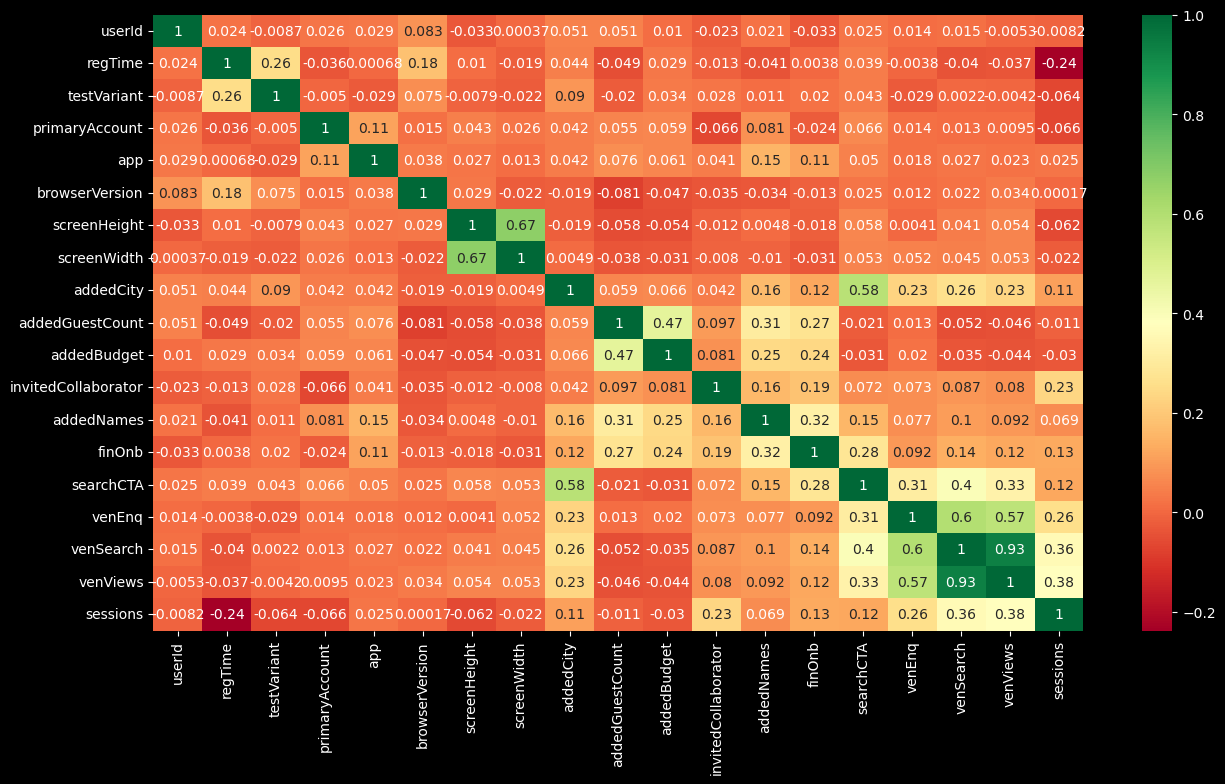

In [12]:
plt.figure(figsize=(15,8))  # on this line I just set the size of figure to 12 by 10.
sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [13]:
df.columns


Index(['userId', 'regTime', 'testVariant', 'primaryAccount', 'regPage',
       'device', 'app', 'browser', 'browserVersion', 'screenHeight',
       'screenWidth', 'authMethod', 'locationStep', 'addedCity',
       'locationCountry', 'addedGuestCount', 'addedBudget',
       'invitedCollaborator', 'addedNames', 'finOnb', 'searchCTA', 'venEnq',
       'venSearch', 'venViews', 'sessions'],
      dtype='object')

In [14]:
df.apply(lambda x: x.nunique())

userId                 1051
regTime                 108
testVariant               3
primaryAccount            2
regPage                   3
device                    3
app                       2
browser                   2
browserVersion            7
screenHeight             43
screenWidth              17
authMethod                3
locationStep              4
addedCity                 2
locationCountry           7
addedGuestCount           2
addedBudget               2
invitedCollaborator       2
addedNames                2
finOnb                    2
searchCTA                 2
venEnq                   22
venSearch                52
venViews                 57
sessions                 22
dtype: int64

In [15]:
df.isnull().sum()

userId                   0
regTime                  0
testVariant              0
primaryAccount           0
regPage                  0
device                   0
app                      0
browser                  0
browserVersion         642
screenHeight             0
screenWidth              0
authMethod               0
locationStep             0
addedCity                0
locationCountry        609
addedGuestCount          0
addedBudget              0
invitedCollaborator      0
addedNames               0
finOnb                   0
searchCTA                0
venEnq                   0
venSearch                0
venViews                 0
sessions                 0
dtype: int64

In [16]:
df.groupby(['testVariant','finOnb']).agg({'finOnb': lambda x: x.value_counts()})

finOnb
testVariant finOnb        
0           0           51
            1          536
1           0           27
            1          270
2           0           11
            1          156

In [17]:
df.groupby(['testVariant']).agg({'finOnb': 'mean'})

,finOnb
testVariant,
0,0.913118
1,0.909091
2,0.934132


In [18]:
df.groupby(['testVariant','searchCTA']).agg({'searchCTA': lambda x: x.value_counts()})

searchCTA
testVariant searchCTA           
0           0                321
            1                266
1           0                160
            1                137
2           0                 80
            1                 87

In [19]:
df.groupby(['testVariant']).agg({'searchCTA': 'mean'})

,searchCTA
testVariant,
0,0.453152
1,0.461279
2,0.520958


In [20]:
df.groupby(['testVariant']).agg({'venEnq': 'mean'})

,venEnq
testVariant,
0,0.921635
1,0.875421
2,0.688623


In [21]:
df.groupby(['testVariant']).agg({'venSearch': 'mean'})

,venSearch
testVariant,
0,5.287905
1,4.198653
2,5.916168


In [22]:
df.groupby(['testVariant']).agg({'venViews': 'mean'})

,venViews
testVariant,
0,5.318569
1,4.114478
2,5.766467


In [23]:
df.groupby(['testVariant']).agg({'sessions': 'mean'})

,sessions
testVariant,
0,3.684838
1,2.734007
2,3.377246


# Starting PCA 

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [25]:
features = ["addedNames", "addedGuestCount", "addedCity", "searchCTA"]
X = df.copy()
y = X.pop('finOnb')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [26]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,0.854717,-1.141355,0.107836,0.036177
1,0.854717,-1.141355,0.107836,0.036177
2,-0.399820,-0.480905,0.159850,-1.378656
3,-1.719825,0.037058,0.576143,0.048889
4,1.300528,0.380438,-1.277789,0.300314


The PCA instance's components_ attribute contains loadings after fitting. Unfortunately, PCA terminology varies. The transformed columns in X_pca are called components by convention. We'll dataframe the loadings.


In [27]:

loadings = pd.DataFrame(
    pca.components_.T,  
    columns=component_names,  
    index=X.columns, 
)
loadings

,PC1,PC2,PC3,PC4
addedNames,-0.388745,-0.560053,-0.729404,0.056451
addedGuestCount,-0.210056,-0.717035,0.652876,-0.124456
addedCity,-0.642425,0.252084,0.202603,0.694763
searchCTA,-0.626134,0.329627,0.025960,-0.706136


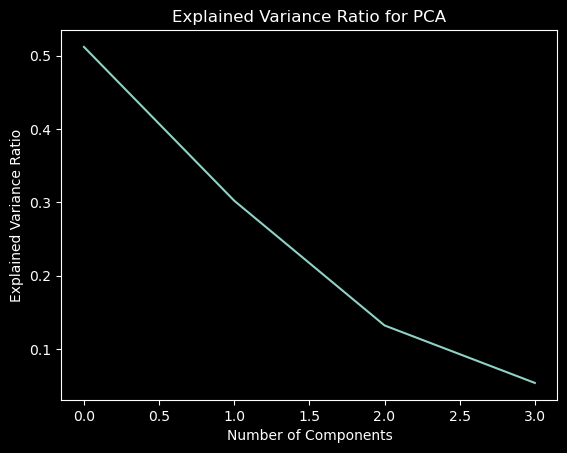

In [28]:
pca = PCA()

# Fit the data to PCA
pca.fit(X)

# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for PCA')
plt.show()

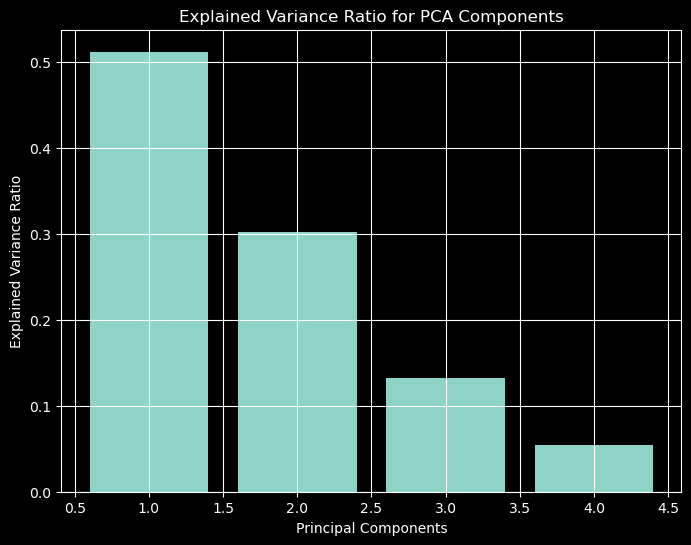

In [29]:

pca = PCA()
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for PCA Components')
plt.grid()
plt.show()

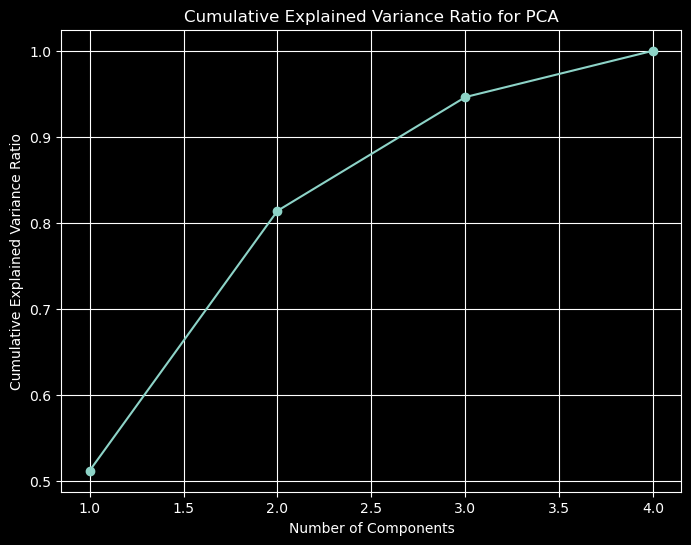

In [30]:
pca = PCA()
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio for PCA')
plt.grid()
plt.show()

## Although PC1 is quite informative, the remaining components still have a substantial link with finalizing the operation despite their little fluctuation. It may be beneficial to investigate these subfactors later in order to identify associations missed.